# Loading Packages

In [101]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold,GridSearchCV

# Reading Data

In [3]:
# loading the data
train_exit=pd.read_csv("/content/train_exit.csv")

# Understanding the Data(Preprocessing)

In [8]:
#display the first 5 observations
train_exit.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [4]:
#display the last 5 observations
train_exit.tail()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
13989,PLID_10956,Viva Stepney,20,M,Uruguay,6'0,161lbs,60.0,48.0,62.0,...,Right,6.0,NaN,7.6,2.0,Medium,Academy,6.0,0.0,1
13990,PLID_17290,Illa Pitre,18,F,England,5'10,165lbs,53.0,68.0,59.0,...,Right,5.3,0.0,5.6,3.0,Medium,Academy,4.0,0.0,0
13991,PLID_5193,Marylouise Mosley,17,M,Japan,6'0,172lbs,56.0,73.0,62.0,...,Left,5.7,0.0,7.7,3.0,Low,Talent Hunt,2.0,0.0,1
13992,PLID_12173,Teri Escamilla,20,F,Ukraine,5'10,150lbs,71.0,69.0,70.0,...,Left,6.8,1.0,5.8,4.0,Medium,Academy,6.0,0.0,1
13993,PLID_236,Darius Schuman,16,F,Chile,5'8,159lbs,53.0,59.0,67.0,...,Right,4.2,0.0,6.7,0.0,Medium,Source,1.0,0.0,0


In [5]:
# display the number of observations(rows) and features(columns)
train_exit.shape

(13994, 30)

In [6]:
#statistics summary of data
train_exit.describe()

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,13994.000000,13994.000000,...,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,48.108118,52.935973,...,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,16.821929,14.201782,...,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,13.000000,...,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,...,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,...,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,...,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,89.000000,...,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


In [7]:
# get the shape of object types of  data
train_exit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [9]:
#get the number of missing records in each column
train_exit.isnull().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [10]:
#check for duplicate values
train_exit[train_exit.duplicated(keep='first')]

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection


**No Duplicates**

# Handling Missing Values:

In [15]:
train_exit['gender'] = train_exit['gender'].fillna(train_exit['gender'].mode()[0])
train_exit['weight'] = train_exit['weight'].fillna(train_exit['weight'].mode()[0])
train_exit['ball_controlling_skills'] = train_exit['ball_controlling_skills'].fillna(train_exit['ball_controlling_skills'].mean())
train_exit['jumping_skills'] = train_exit['jumping_skills'].fillna(train_exit['jumping_skills'].mean())
train_exit['penalties_conversion_rate'] = train_exit['penalties_conversion_rate'].fillna(train_exit['penalties_conversion_rate'].mean())
train_exit['mental_strength'] = train_exit['mental_strength'].fillna(train_exit['mental_strength'].mean())
train_exit['shot_accuracy'] = train_exit['shot_accuracy'].fillna(train_exit['shot_accuracy'].mean())
train_exit['strong_foot'] = train_exit['strong_foot'].fillna(train_exit['strong_foot'].mode()[0])
train_exit['behaviour_rating'] = train_exit['behaviour_rating'].fillna(train_exit['behaviour_rating'].mean())
train_exit['matches_played'] = train_exit['matches_played'].fillna(train_exit['matches_played'].mean())
train_exit['fitness_rating'] = train_exit['fitness_rating'].fillna(train_exit['fitness_rating'].mean())
train_exit['coaching'] = train_exit['coaching'].fillna(train_exit['coaching'].mode()[0])
train_exit['years_of_experience'] = train_exit['years_of_experience'].fillna(train_exit['years_of_experience'].mean())

In [16]:
train_exit.isnull().sum()

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

# Exploratory Data Analysis

# Independent Variable (Categorical)

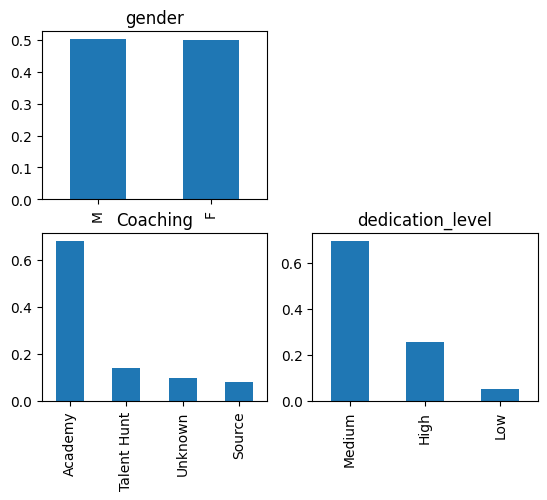

In [20]:
plt.subplot(221)
train_exit['gender'].value_counts(normalize=True).plot.bar(title= 'gender')
plt.subplot(223)
train_exit['coaching'].value_counts(normalize=True).plot.bar(title= 'Coaching')
plt.subplot(224)
train_exit['dedication_level'].value_counts(normalize=True).plot.bar(title= 'dedication_level')
plt.show()

# Categorical Independent Variable vs Target Variable

<Axes: xlabel='gender'>

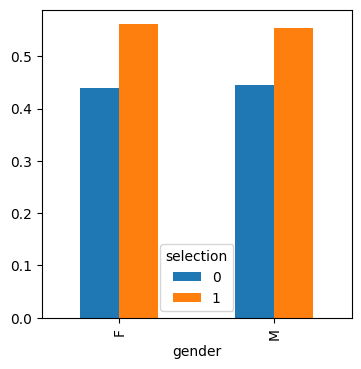

In [21]:
Gender=pd.crosstab(train_exit['gender'],train_exit['selection'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))

## Now let us visualize the remaining categorical variables vs the target variables

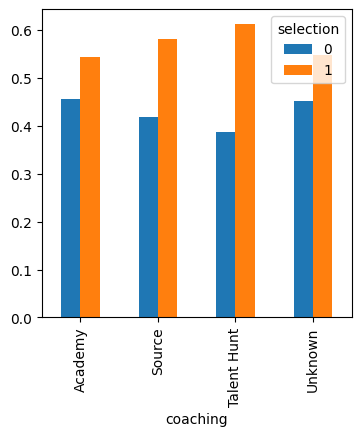

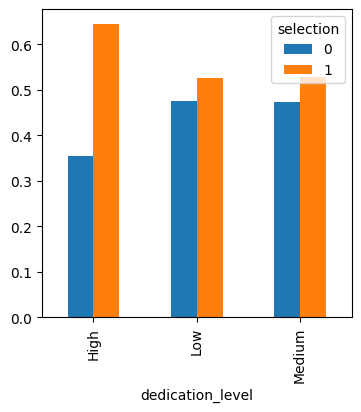

In [23]:
coaching=pd.crosstab(train_exit['coaching'],train_exit['selection'])
dedication_level=pd.crosstab(train_exit['dedication_level'],train_exit['selection'])

coaching.div(coaching.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))

dedication_level.div(dedication_level.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.show()


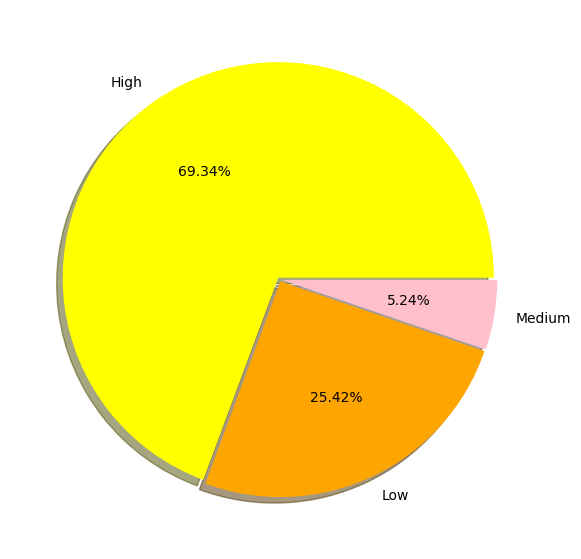

In [27]:
size = train_exit['dedication_level'].value_counts()
labels = ['High', 'Low', 'Medium']
color = ['yellow', 'orange','pink']
explode = [0.01, 0.01, 0.01]

plt.figure(figsize = (7,7))
plt.pie(size, labels=labels, colors=color, explode=explode, autopct='%.2f%%', shadow = True)
plt.show()

# Model Building

In [114]:
feature_columns = ['ball_controlling_skills', 'body_reflexes', 'body_balance','jumping_skills','penalties_conversion_rate','mental_strength','goalkeeping_skills',
'defending_skills',
]
X = train_exit[feature_columns].values
y = train_exit['selection'].values


# Splitting the data

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

# Building Models

In [116]:
models = [['LogisticRegression ', LogisticRegression()],
        ['DecisionTreeClassifier ', DecisionTreeClassifier()],
        ['RandomForestClassifier ', RandomForestClassifier()],
        ['KNeighborsClassifier ', KNeighborsClassifier()],
         ['SVC ', SVC()]]

In [117]:
for name, model in models:
    model = model
    model.fit(X_train, y_train)
    prediction = model.predict(X)
    print(name, accuracy_score(y, prediction))

LogisticRegression  0.6518507931970845
DecisionTreeClassifier  0.8920966128340717
RandomForestClassifier  0.9116049735600972
KNeighborsClassifier  0.7481063312848364


Here i am selecting  RandomForestClassifier,DecisionTreeClassifier,KNeighborsClassifier   for Hyperparameter Tuning based the accuracy scores

# Hyperparameter Tuning

In [118]:
SKF = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

clf = GridSearchCV(SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=SKF, return_train_score=False)

In [120]:
model_params = {

    'DecisionTreeClassifier  ': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini', 'entropy']
        }
    },
    'Random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'KNeighbors': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [5,8,10]
        }
    }

}

In [113]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=SKF, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_

    })

df = pd.DataFrame(scores,columns=['model','best_score'])
df

,model,best_score
0,DecisionTreeClassifier,0.650842
1,Random_forest,0.694946
2,KNeighbors,0.675549


# Random forest is giving the the best accuracy